In [56]:
# import libraries
import numpy as np
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Ignore harmless warnings 
import warnings 
warnings.filterwarnings("ignore") 

# Invertibility of Time Series

### Invertibility refers to the fact that the moving average (MA) models can be written as an autoregressive (AR) models and vice-versa. AR(1) process is invertible and the current value of the series expressed in terms of a current error and the lagged values of the errors.

## AR(1) = MA(∞) Explanation :-

### AR(1) Model :-
#### We will be checking ACF in this case as PACF for AR(1) will be only upto 1 lag.

Is the model invertible? :- True
ArmaProcess
AR: [1.0, -0.8]
MA: [1.0]


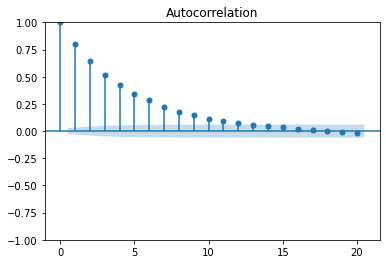

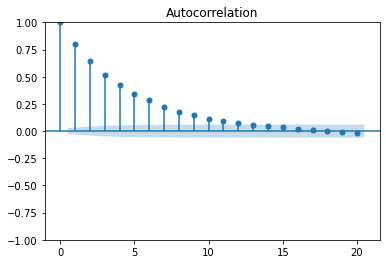

In [64]:
# For AR(1) model, setting value of AR and MA with phi = 0.8
phi = 0.8
ma = np.array([1])
ar = np.array([1, -phi])

# Processing the ARMA model which is AR(1) in this case
AR_object = ArmaProcess(ar, ma)

# Generating data for simulation with different samples
simulated_data = AR_object.generate_sample(nsample=5000)

# check whether the model is invertible
print("Is the model invertible? :-", AR_object.isinvertible) # AR model is always invertible

# printing the AR and MA components
print(AR_object)

# Plot the ACF
plot_acf(simulated_data, lags=20)

### The AR(1) process is invertible. For |phi|<1, the series converges to zero. The value of its coefficient will start to decrease and will tend to zero if we take more number of lags. This implies that more weightage is given to the recent past observation and the weightage decreases as we move towards far observations in the past. Therefore, here only 20 lags are taken upto which the value of coefficient is significant. This model can be inverted into MA(infinite) model.

### MA(∞) Model :-

ArmaProcess
AR: [1.0]
MA: [1.0, 0.8, 0.6400000000000001, 0.5120000000000001, 0.4096000000000001, 0.3276800000000001, 0.2621440000000001, 0.20971520000000007, 0.1677721600000001, 0.13421772800000006, 0.10737418240000006, 0.08589934592000005, 0.06871947673600004, 0.054975581388800036, 0.043980465111040035, 0.03518437208883203, 0.028147497671065624, 0.022517998136852502, 0.018014398509482003, 0.014411518807585602]


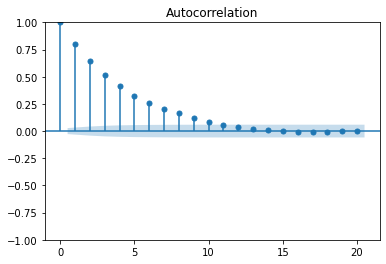

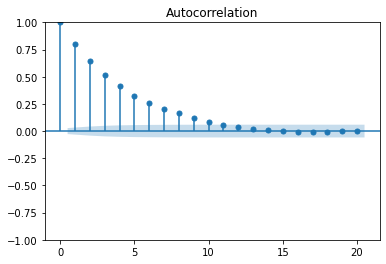

In [54]:
# Taking the value of MA till 20 lags with phi = 0.8
phi = 0.8
ma = [phi ** i for i in range(20)]
ar = np.array([1])

# Processing the ARMA model which is MA(20) in this case
MA_object = ArmaProcess(ar, ma)

# Generating data for simulation with different samples
simulated_data = MA_object.generate_sample(nsample=5000)

# printing the AR and MA components
print(MA_object)

# Plot the ACF
plot_acf(simulated_data, lags=20)

### We can see from the above ACF plots of both the models that the autocorrelation functions of both the models i.e. AR(1) and MA(20) are same which represents that we can invert the AR(1) model into MA(infinite) model.

## MA(1) = AR(∞) Explanation :- 

### MA(1) process can be inverted and the current value of the series expressed in terms of a current error and the past observations of the series, instead of a current error and  lagged error values.

### MA(1) Model :-
#### We will be checking PACF in this case as ACF for MA(1) will be only upto 1 lag.

Is the model invertible? :- True
ArmaProcess
AR: [1.0]
MA: [1.0, -0.8]


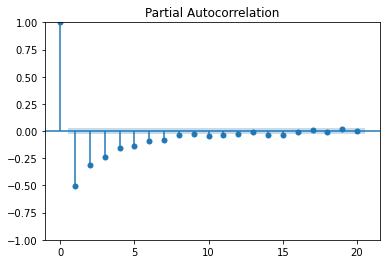

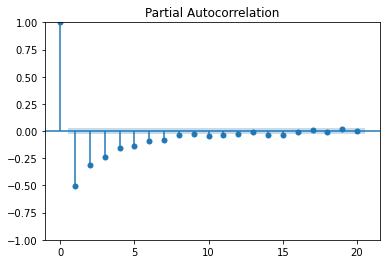

In [55]:
# For MA(1) model, setting value of AR and MA with theta = 0.8
theta = 0.8
ar = np.array([1])
ma = np.array([1, -theta])

# Processing the ARMA model which is MA(1) in this case
MA_object = ArmaProcess(ar, ma)

# Generating data for simulation with different samples
simulated_data = MA_object.generate_sample(nsample=5000)

# check whether the model is invertible
# Note that the series is invertible if |theta|<1 which is 0.8 in this case
print("Is the model invertible? :-", MA_object.isinvertible)

# printing the AR and MA components
print(MA_object)

# Plot the ACF
plot_pacf(simulated_data, lags=20)

### The MA(1) process is considered invertible if: |theta|<1. If the value of |theta| > 1 then it is not invertible. For |theta|<1, the series converges to zero. The value of its coefficient will start to decrease and will tend to zero if we take more number of lags. This implies that more weightage is given to the recent past observation and the weightage decreases as we move towards far observations in the past. Therefore, here only 20 lags are taken upto which the value of coefficient is significant. This model can be inverted to an AR(infinite) model.

### AR(∞) Model :-

ArmaProcess
AR: [1.0, 0.8, 0.6400000000000001, 0.5120000000000001, 0.4096000000000001, 0.3276800000000001, 0.2621440000000001, 0.20971520000000007, 0.1677721600000001, 0.13421772800000006, 0.10737418240000006, 0.08589934592000005, 0.06871947673600004, 0.054975581388800036, 0.043980465111040035, 0.03518437208883203, 0.028147497671065624, 0.022517998136852502, 0.018014398509482003, 0.014411518807585602]
MA: [1.0]


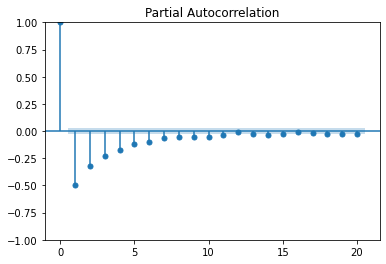

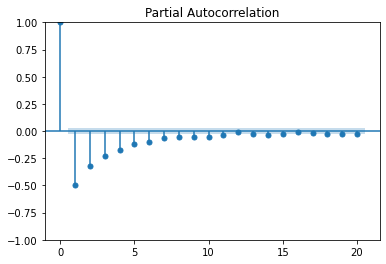

In [49]:
# Taking the value of AR till 20 lags with theta = 0.8
theta = 0.8
ar = [theta ** i for i in range(20)]
ma = np.array([1])

# Processing the ARMA model which is AR(20) in this case
AR_object = ArmaProcess(ar, ma)

# Generating data for simulation with different samples
simulated_data = AR_object.generate_sample(nsample=5000)

# printing the AR and MA components
print(AR_object)

# Plot the ACF
plot_pacf(simulated_data, lags=20)

### We can see from the above PACF plots of both the models that the partial autocorrelation function of both the models i.e. MA(1) and AR(20) are same which represents that we can invert the MA(1) model into AR(infinite) model.

## Example of Non-Invertible MA model

In [50]:
# For MA(1) model, setting value of AR and MA with theta = 1.8
theta = 1.8
ar = np.array([1])
ma = np.array([1, -theta])

# Processing the ARMA model which is MA(1) in this case
MA_object = ArmaProcess(ar, ma)

# Generating data for simulation with different samples
simulated_data = MA_object.generate_sample(nsample=5000)

# check whether the model is invertible
# Note that the series is not invertible if |theta|>1 which is 1.8 in this case
print("Is the model invertible? :-", MA_object.isinvertible)

Is the model invertible? :- False
